In [503]:
import pandas as pd
import re
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42

In [439]:
df = pd.read_csv('dreams.csv')

In [440]:
df.head()

,content,id
0,"\n#1 (1957)The one at the Meads's house, where...",alta
1,\n#2 (8/11/67)I'm at a family reunion in a lar...,alta
2,\n#3 (8/1/85)I watch a plane fly past and shor...,alta
3,\n#4 (1985?)Me pulling the green leaves and be...,alta
4,\n#5 (1985?)I'm in a room that reminds me of (...,alta


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import stop_words
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

custom_stopwords = ['did', 'don', 'didn', 'came', 'got', 'going', 'just'] + list(stop_words.ENGLISH_STOP_WORDS)

# Vectorize and save into a new dataframe
vec = TfidfVectorizer(stop_words=custom_stopwords,
                      #tokenizer=textblob_tokenizer,
                      max_df=0.95,
                      min_df=0.15,
                      max_features=1000,
                      use_idf=True)

# Fit from the 'text' column of our dataframe
matrix = vec.fit_transform(df['content'])

# Then turn it into a new dataframe
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

In [17]:
results.head()

,dream,house,know,like,little,look,man,people,room,said,say,think,time,went
0,0.000000,0.676375,0.000000,0.169588,0.490429,0.000000,0.218161,0.206112,0.427972,0.000000,0.000,0.000000,0.000000,0.000000
1,0.000000,0.373968,0.353822,0.562594,0.406738,0.000000,0.000000,0.341879,0.000000,0.000000,0.000,0.368956,0.000000,0.000000
2,0.219787,0.425963,0.201508,0.160203,0.000000,0.000000,0.000000,0.194706,0.202144,0.000000,0.221,0.630381,0.423065,0.000000
3,0.000000,0.288699,0.136573,0.217157,0.627993,0.309472,0.000000,0.131963,0.137004,0.000000,0.000,0.569659,0.000000,0.000000
4,0.000000,0.133798,0.506361,0.201284,0.000000,0.000000,0.000000,0.244634,0.380969,0.403135,0.000,0.132005,0.531551,0.133073


In [18]:
from sklearn.cluster import KMeans

# How many clusters?
number_of_clusters=3
km = KMeans(n_clusters=number_of_clusters)

# Let's fit it!
km.fit(matrix)
km.fit

<bound method KMeans.fit of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)>

In [19]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :10]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: like people think know look room say little time house
Cluster 1: man like say people room look house know think time
Cluster 2: said dream went room house people time know think say


In [20]:
df['category'] = km.labels_
df.head()

,content,id,category
0,"\n#1 (1957)The one at the Meads's house, where...",alta,2
1,\n#2 (8/11/67)I'm at a family reunion in a lar...,alta,0
2,\n#3 (8/1/85)I watch a plane fly past and shor...,alta,2
3,\n#4 (1985?)Me pulling the green leaves and be...,alta,0
4,\n#5 (1985?)I'm in a room that reminds me of (...,alta,2


In [24]:
words_to_exclude = ['was', 'have', 'can', 'don', 'just', 'am', 
                    'will', 'had', 'do', 'want', 'could', 'would', 
                    'never', 'ever', 'didn', 'did', 'got', 'get', 
                    'couldn', 'were', 'should', 'started']

df['I'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= I )[a-zA-Z]+', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['I'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

think           4914
see             4628
say             3549
went            3527
go              3447
said            2730
saw             2674
thought         2474
feel            2102
remember        1895
know            1879
look            1775
told            1655
knew            1580
felt            1422
tell            1390
wanted          1355
walk            1295
ask             1293
woke            1223
asked           1214
looked          1208
try             1145
realize         1138
realized        1111
put              983
guess            889
found            866
find             827
are              817
                ... 
possessively       1
sword              1
relook             1
fishing            1
coolly             1
startle            1
commit             1
surmise            1
dozed              1
guardedly          1
bunny              1
embraced           1
flick              1
way                1
grind              1
pushing            1
frown        

In [23]:
df['his'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= his )[a-zA-Z]+', x['content'])],
    axis=1)

his_list = pd.Series([element for list_ in df['his'] for element in list_])
his_list.value_counts()

head             372
wife             356
hand             262
face             254
name             180
house            158
car              157
back             150
arm              138
mother           130
arms             118
friends          116
hands            107
family           105
father           104
eyes             102
mouth            101
friend           100
own               98
office            95
hair              91
room              89
way               79
girlfriend        78
penis             76
brother           72
son               72
body              72
chest             71
parents           63
                ... 
tactics            1
bag                1
swimming           1
blond              1
attendants         1
post               1
exercises          1
homosexual         1
commencement       1
wiry               1
crude              1
kisses             1
lighter            1
sick               1
anteroom           1
detriment          1
function     

In [25]:
df['her'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= her )[a-zA-Z]+', x['content'])],
    axis=1)

his_list = pd.Series([element for list_ in df['her'] for element in list_])
his_list.value_counts()

and               1119
to                 926
that               431
i                  337
in                 280
if                 246
head               222
face               219
husband            199
a                  198
up                 188
about              187
back               178
mother             177
for                160
house              157
hand               155
name               135
hair               133
how                126
what               126
the                117
on                 114
room               106
as                 106
out                105
car                102
because             99
with                94
she                 90
                  ... 
daily                1
splattered           1
daugther             1
overalls             1
puppy                1
bowels               1
seldom               1
pharmacy             1
cross                1
placed               1
concerns             1
divorced             1
halloween  

In [26]:
words_to_exclude = ['the','be','get','go','me','a','do','another','my','take','have',
                    'him','her','make','find','leave','them','come','put','look',
                    'talk','tell','give','keep','his','walk','this','questions','it','use',
                    'myself', 'where', 'our', 'an', 'some', 'let', 'someone', 'one', 'us']

df['to'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= to )[a-zA-Z]+', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['to'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

see            2772
help           1138
work            702
say             613
play            577
try             576
move            563
stop            562
stay            543
know            540
sleep           531
sit             508
eat             497
run             433
drive           422
call            410
buy             407
ask             393
show            390
pick            388
meet            385
turn            359
start           327
wait            325
figure          319
kill            312
catch           304
visit           302
pay             293
live            292
               ... 
hillston          1
stomach           1
cold              1
sift              1
strain            1
becker            1
greater           1
weaponry          1
straggle          1
session           1
sarah             1
assent            1
curve             1
temp              1
venture           1
cement            1
alig              1
newtonville       1
portland          1


In [27]:
words_to_exclude = ['was', 'have', 'can', 'don', 'just', 'am', 
                    'will', 'had', 'do', 'want', 'could', 'would', 
                    'never', 'ever', 'didn', 'did', 'got', 'get', 
                    'couldn', 'were', 'should', 'started', 'is', 'has',
                    'and', 'doesn', 'gets', 'wouldn',]

df['he'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= he )[a-zA-Z]+', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['he'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

said           688
says           358
wanted         252
wants          195
came           193
does           149
wasn           147
told           140
went           136
knew           117
comes          103
looked         100
took            93
won             93
left            91
goes            90
asked           90
gave            89
looks           83
knows           80
must            79
put             79
thought         79
seemed          77
really          72
saw             69
might           65
walked          65
thinks          65
kept            63
              ... 
submits          1
thru             1
exclaims         1
mind             1
dusty            1
athought         1
reattached       1
ponders          1
regrets          1
show             1
differed         1
grins            1
upset            1
interpreted      1
smirks           1
ransacked        1
morphed          1
mutters          1
recommends       1
complains        1
transforms       1
vocalizes   

In [28]:
words_to_exclude = ['was', 'have', 'can', 'don', 'just', 'am', 
                    'will', 'had', 'do', 'want', 'could', 'would', 
                    'never', 'ever', 'didn', 'did', 'got', 'get', 
                    'couldn', 'were', 'should', 'started', 'is', 'has',
                    'and', 'doesn', 'gets', 'wouldn',]

df['she'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= she )[a-zA-Z]+', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['she'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

said            589
says            286
wanted          202
wants           141
came            130
told            119
does            109
wasn            109
gave             87
went             86
thought          79
knew             76
took             73
left             64
comes            63
asked            62
looked           61
goes             60
won              60
knows            60
looks            57
saw              57
tells            56
might            55
seemed           54
needed           51
needs            50
thinks           49
must             47
sees             46
               ... 
soon              1
gathered          1
successfully      1
cleaned           1
caught            1
wrestled          1
haole             1
procure           1
winked            1
somersaults       1
ascended          1
combed            1
slept             1
pencil            1
submits           1
boxed             1
sad               1
climaxes          1
repeats           1


In [29]:
words_to_exclude = ['i', 'we', 'that', 'he', 'they', 'it', 
                    'much', 'she', 'the', 'on', 'many', 'as', 
                    'you', 'there', 'when', 'no', 'my', 'then', 
                    'in', 'was', 'often', 'to', 'j', 'if',
                    'is', 'this', 'gets', 'wouldn',]

df['so'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= so )[a-zA-Z]+', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['so'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

long            140
happy            93
close            92
far              90
hard             64
good             63
bad              63
well             61
big              60
and              53
fast             49
forth            43
upset            41
angry            37
tired            34
high             33
excited          32
small            31
people           31
real             29
scared           29
nice             29
late             28
glad             25
loud             23
mad              23
very             22
sad              22
cute             21
crowded          20
               ... 
joyful            1
unimportant       1
jimmy             1
precarious        1
exposed           1
apparent          1
vandals           1
alone             1
age               1
fragmented        1
covered           1
innocuous         1
place             1
trapped           1
goodnight         1
move              1
compellingly      1
across            1
obsessed          1


In [30]:
words_to_exclude = ['i', 'we', 'that', 'he', 'they', 'it', 
                    'much', 'she', 'the', 'on', 'many', 'as', 
                    'you', 'there', 'when', 'no', 'my', 'then', 
                    'in', 'was', 'often', 'to', 'j', 'if',
                    'is', 'this', 'gets', 'wouldn',]

df['extremely'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= extremely )[a-zA-Z]+', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['extremely'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

upset            13
large             9
happy             8
angry             8
nervous           7
anxious           6
steep             5
cold              4
curious           4
sad               4
heavy             4
tired             4
surprised         3
good              3
dangerous         3
attractive        3
pleasant          3
poor              3
hot               2
long              2
small             2
agitated          2
short             2
nice              2
frustrated        2
distraught        2
tall              2
perplexed         2
uncomfortable     2
frightened        2
                 ..
conspicuous       1
heated            1
unnecessary       1
slow              1
irritable         1
fed               1
impatient         1
selfish           1
seriously         1
icy               1
helpful           1
powerful          1
peaked            1
confident         1
hazy              1
valuable          1
belligerent       1
dejected          1
hilly             1


In [31]:
words_to_exclude = ['go', 'get', 'be', 'do', 'have']

df['wanted_to'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= wanted to )[a-zA-Z]+', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['wanted_to'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

see          113
know          87
take          70
make          61
talk          48
buy           34
play          27
keep          26
leave         26
stay          25
help          23
tell          23
put           21
come          20
give          19
show          19
say           18
ask           18
try           17
watch         16
stop          16
marry         14
hear          14
find          14
call          13
use           13
join          12
sit           12
look          12
sleep         11
            ... 
cheer          1
burn           1
pass           1
trade          1
phone          1
spit           1
toy            1
gain           1
attend         1
devour         1
slip           1
smash          1
rob            1
harmonize      1
witness        1
respect        1
so             1
search         1
answer         1
couldn         1
insert         1
disturb        1
my             1
color          1
bathe          1
carve          1
dry            1
silk          

In [32]:
words_to_exclude = ['was', 'have', 'can', 'don', 'just', 'am', 
                    'will', 'had', 'do', 'want', 'could', 'would', 
                    'never', 'ever', 'didn', 'did', 'got', 'get', 
                    'couldn', 'were', 'should', 'started', 'is', 'has',
                    'and', 'doesn', 'gets', 'wouldn', 'are', 'all', 'weren',
                    'went', 'came', 'come', 'must', 'might']

df['they'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= they )[a-zA-Z]+', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['they'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

said            195
wanted          139
thought          72
knew             70
won              69
seemed           68
left             65
looked           64
look             63
took             61
say              53
need             53
go               52
told             52
aren             52
put              52
needed           50
know             49
think            48
saw              46
both             46
really           45
gave             43
made             42
seem             39
may              35
called           33
used             33
leave            31
see              30
               ... 
shrank            1
blew              1
announce          1
dive              1
later             1
corresponded      1
lean              1
sewed             1
emanate           1
flashed           1
cautiously        1
emerge            1
drew              1
as                1
accidentally      1
assured           1
placed            1
punish            1
hope              1


In [33]:
words_to_exclude = []

df['like_a'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= like a )[a-zA-Z]+', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['like_a'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

little         54
baby           37
small          37
big            36
very           31
large          30
movie          25
man            22
huge           21
hotel          20
school         17
maze           16
cat            16
child          15
giant          14
roller         13
cross          12
good           12
store          12
hospital       12
regular        12
real           11
bus            11
lot            11
dog            11
carnival       11
black          11
normal         11
city           11
nice           10
               ..
quick           1
fine            1
crotch          1
railroad        1
dwarf           1
delicious       1
scissors        1
novel           1
bean            1
scavenger       1
problem         1
temporary       1
spacious        1
homecoming      1
grumpy          1
maniac          1
primary         1
trumpet         1
tick            1
towel           1
toddler         1
version         1
gifted          1
fishbowl        1
leech     

In [34]:
words_to_exclude = []

df['saw_a'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= saw a )[a-zA-Z]+', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['saw_a'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

man            43
big            33
lot            30
woman          23
small          20
girl           18
sign           16
boy            16
huge           15
little         14
picture        13
large          13
group          13
young          12
car            11
very           10
red             9
couple          9
bunch           9
fellow          7
beautiful       7
friend          7
lady            6
horse           6
few             5
policeman       5
black           5
name            5
white           5
number          5
               ..
dress           1
bulldozer       1
volcano         1
cab             1
boat            1
wave            1
company         1
half            1
crab            1
rifle           1
slip            1
humming         1
russian         1
rooster         1
technicolor     1
crow            1
racing          1
meteor          1
kid             1
face            1
professor       1
birth           1
hall            1
rock            1
bedroom   

In [35]:
words_to_exclude = []

df['to_the'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= to the )[a-zA-Z]+', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['to_the'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

other          347
bathroom       344
door           285
right          257
house          255
left           226
front          226
top            218
back           178
car            178
ground         161
side           157
next           151
beach          115
end            107
floor          107
bottom         104
man             96
edge            93
kitchen         93
hospital        93
store           86
room            82
office          81
window          79
airport         71
basement        70
woman           70
street          63
place           58
              ... 
korean           1
shade            1
jail             1
graduation       1
prisoners        1
fridge           1
skin             1
racks            1
bicycle          1
gun              1
writhing         1
bumper           1
sidewalks        1
sturdiest        1
liquor           1
satin            1
meatballs        1
seating          1
teaching         1
louvre           1
chickens         1
compartment 

In [36]:
words_to_exclude = []

df['in'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= in the )[a-zA-Z]+', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['in'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

dream          827
back           656
middle         512
car            462
room           456
house          389
water          381
front          336
kitchen        297
same           240
air            234
morning        223
living         221
bathroom       199
basement       165
country        126
other          118
center         117
distance       113
store          102
hall           102
next           102
parking        100
hospital        98
way             95
first           94
sky             93
woods           92
door            90
corner          88
              ... 
skinners         1
oldest           1
junk             1
pathology        1
designer         1
condition        1
pencil           1
illuminated      1
league           1
recessed         1
employee         1
rockies          1
wash             1
copy             1
terrace          1
cleveland        1
arts             1
sleazy           1
medical          1
showcase         1
mold             1
humanities  

In [37]:
words_to_exclude = []

df['in_a'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= in a )[a-zA-Z]+', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['in_a'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

room           436
car            359
house          330
large          293
small          255
very           202
big            201
hospital       135
building       114
hurry          110
chair          108
wheelchair     105
place          103
long           102
different       97
hotel           95
row             85
little          84
while           84
huge            83
store           83
circle          83
bed             82
strange         80
few             69
group           69
corner          68
restaurant      68
play            64
sort            60
              ... 
sad              1
swift            1
photograph       1
girl             1
shake            1
sarcastic        1
kingdom          1
spacesuit        1
help             1
casket           1
monotone         1
crock            1
nonexistant      1
carved           1
civilized        1
flask            1
brewery          1
striking         1
dreamy           1
boys             1
slimy            1
folded      

In [38]:
words_to_exclude = []

df['strange'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= strange )[a-zA-Z]+', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['strange'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

because         40
to              32
and             29
that            29
thing           26
house           20
place           19
dream           19
man             18
city            17
people          13
town            12
part            11
about           10
looking          9
things           8
sort             8
feeling          7
way              7
lady             7
reason           7
men              6
little           6
neighborhood     6
street           5
name             5
noises           5
one              5
land             5
happened         5
                ..
small            1
piano            1
plant            1
intersection     1
residential      1
boxes            1
race             1
topic            1
planet           1
questions        1
rhythms          1
magazines        1
letters          1
concept          1
cab              1
vintage          1
group            1
cookies          1
seeing           1
battle           1
symbols          1
bug         

In [39]:
words_to_exclude = []

df['into'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= into a )[a-zA-Z]+', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['into'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

room           107
small           76
building        40
large           36
store           33
big             29
car             29
house           28
bathroom        21
huge            20
little          19
bedroom         18
new             18
very            17
place           16
corner          16
tiny            14
sort            14
closet          14
parking         14
hole            13
gas             12
restaurant      12
wall            12
fight           12
box             11
man             11
garage           9
door             9
woman            9
              ... 
hot              1
wastebasket      1
horse            1
dictaphone       1
carriage         1
sleep            1
cute             1
under            1
leather          1
dusty            1
dangerous        1
cocoon           1
quiff            1
police           1
crescent         1
ceiling          1
woolen           1
reception        1
handicapped      1
deck             1
methodist        1
tank        

In [40]:
words_to_exclude = []

df['was'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= was )[a-zA-Z]+', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['was'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

a               6673
in              3927
going           3295
very            1586
the             1516
at              1368
trying          1209
there           1195
on              1092
like            1068
just            1059
sitting          903
not              878
with             877
walking          762
so               741
looking          721
talking          694
an               657
really           655
about            646
supposed         609
doing            607
to               596
getting          595
standing         590
thinking         561
working          555
kind             538
still            526
                ... 
women              1
ellen              1
whirling           1
stout              1
monday             1
news               1
breathtaking       1
tense              1
loosing            1
lousy              1
everett            1
briefing           1
barn               1
echoey             1
considerable       1
obstinate          1
ines         

In [41]:
words_to_exclude = []

df['a'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= a )[a-zA-Z]+', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['a'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

little        2775
lot           1832
small         1752
very          1657
man           1645
big           1619
few           1589
large         1386
woman         1340
long          1276
bit           1202
couple         958
good           936
huge           916
car            890
room           883
house          810
group          737
while          703
place          674
dream          670
friend         655
girl           604
young          585
new            568
table          503
bunch          501
sort           478
baby           452
white          441
              ... 
catechism        1
cad              1
souffle          1
helen            1
basilisk         1
rusted           1
myst             1
dlfferent        1
transistor       1
jazz             1
dappled          1
lieutenant       1
teardrop         1
middleaged       1
schooner         1
boiling          1
cubed            1
dependent        1
marsh            1
va               1
skinned          1
towering    

In [42]:
words_to_exclude = []

df['on_a'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= on a )[a-zA-Z]+', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['on_a'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

couch            166
bus              107
trip              99
table             94
chair             77
bed               76
boat              73
small             71
bicycle           71
train             70
bench             60
street            55
big               51
high              47
hill              46
shelf             45
date              44
little            44
large             42
wall              41
long              40
very              40
ledge             37
plane             36
piece             36
beach             32
road              30
pair              30
side              30
motorcycle        30
                ... 
downtown           1
disguise           1
mountaintop        1
holder             1
greek              1
perpendicular      1
waffle             1
rover              1
pillar             1
normal             1
promontory         1
broad              1
treadmill          1
wooded             1
gauge              1
booth              1
footbridge   

In [43]:
words_to_exclude = []

df['my'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= my )[a-zA-Z]+', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['my'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()[90:]

grandfather     77
knees           76
van             75
neighbor        74
side            74
attention       73
grandmother     73
wallet          72
surprise        71
birth           71
dress           70
computer        68
partner         68
housemate       68
books           67
grade           66
job             66
door            66
shirt           65
money           65
chest           65
eye             65
book            65
penis           64
girl            63
voice           63
camera          60
dog             58
shoulders       58
birthday        58
                ..
bridal           1
surgical         1
flu              1
crap             1
volkswagen       1
stillness        1
synesthesia      1
vein             1
oversight        1
well             1
highland         1
load             1
rearview         1
frustrations     1
strap            1
sky              1
liposuction      1
intensives       1
radiator         1
loans            1
smart            1
playboy     

In [44]:
words_to_exclude = []

df['have'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?<= have )[a-zA-Z]+', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['have'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()[90:]

told           15
brought        15
walked         14
too            14
your           14
changed        14
with           14
arrived        14
met            14
room           14
died           14
really         13
wanted         13
those          13
good           13
used           13
sexual         13
long           13
difficulty     13
returned       12
started        12
run            12
us             12
looked         12
none           11
children       11
eaten          11
hit            11
four           11
what           11
               ..
baskets         1
trailer         1
repeatedly      1
consented       1
wakened         1
rarely          1
spirit          1
bumped          1
boat            1
physically      1
despite         1
mattered        1
sheered         1
naturally       1
suspected       1
taxi            1
kc              1
harrison        1
tight           1
anticipated     1
surrounded      1
neglected       1
funky           1
soft            1
saddles   

In [45]:
words_to_exclude = []

df['creature'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?:\S+\s)?\S*creature\S*(?:\s\S+)?', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['creature'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

the creature is                  3
the creature. he                 2
cartoon creature out             2
this creature was                2
a creature that                  2
of creature, like                1
"outerspace" creature (a         1
another creature had             1
ghost-like creatures came        1
the creatures knew               1
the creatures a                  1
the creature says,               1
female creatures. they           1
one creature follows             1
the creature off                 1
a creature somewhat              1
like creature. another           1
supernatural creature. i         1
the creature does                1
a creature sort                  1
water creatures that             1
sea creatures or                 1
unusual creature because         1
space creature would             1
these creatures hidden           1
these creatures. then            1
furry creatures. the             1
crazed creature that             1
slug-like creatures 

In [46]:
words_to_exclude = []

df['monster'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?:\S+\s)?\S*monster\S*(?:\s\S+)?', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['monster'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

the monster comes                5
the monster was                  5
the monster. i                   4
the monster and                  3
the monster of                   3
the monster could                2
a monster or                     2
see monsters, three              2
the monster, but                 2
a monster. i                     2
the monster woman                2
a monster from                   2
killing monster is               1
more monsters trying             1
about monsters and               1
the monster would                1
horrible monster like            1
supermen monsters! raul          1
alien monsters to                1
a monster, was                   1
more monsters in                 1
things, monsters maybe.          1
a monster. we                    1
a monster, taking                1
a monster now                    1
baggy monster that               1
and monster faces.               1
the "monster-sticks" in          1
of monster or       

In [47]:
words_to_exclude = []

df['animal'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?:\S+\s)?\S*animal\S*(?:\s\S+)?', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['animal'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

stuffed animals and          6
the animal was               4
stuffed animals. i           4
other animals, including     3
of animals on                3
the animals i                3
stuffed animals.             3
other animal that            3
the animals and              3
the animals were             3
an animal or                 3
the animals. you             2
see animals: a               2
small animals in             2
the animal. the              2
other animals were           2
stuffed animals were         2
stuffed animals in           2
these animals were           2
small animals were           2
stuffed animal. we           2
stuffed animals to           2
the animals up               2
the animals to               2
the animals off              2
an animal with               2
the animals back             2
the animal is                2
the animals. the             2
his animal friends           2
                            ..
his animals. when            1
black an

In [48]:
words_to_exclude = []

df['place'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?:\S+\s)?\S*place\S*(?:\s\S+)?', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['place'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

a place to                    182
a place where                 133
took place in                  98
the place where                94
a place that                   88
the place was                  59
the place is                   55
this place is                  32
the place. i                   32
the place and                  32
no place to                    26
a place like                   25
a place with                   25
the place that                 25
takes place in                 24
took place at                  24
a place in                     23
a place for                    23
the place i                    22
the place we                   20
this place where               20
this place that                18
one place to                   18
taking place in                17
this place was                 16
a place i                      15
good place to                  14
in place of                    14
my place. i                    12
the place to  

In [49]:
words_to_exclude = []

df['to'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?:\S+\s)?\S*to\S*(?:\s\S+)?', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['to'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

to the                  995
seemed to be            983
going to be             796
back to the             734
answers to questions    663
go to the               624
up to the               623
trying to get           604
went to the             568
seems to be             554
supposed to be          524
on top of               498
i told him              495
seem to be              487
had to go               463
i told her              458
the top of              389
down to the             346
going to have           317
going to go             316
over to the             299
out to the              296
get to the              287
go into the             282
next to the             273
have to go              273
went into the           259
want to go              248
going to get            248
back into the           245
                       ... 
husband to look           1
love to ron               1
off to marianne:          1
them to eat.              1
is touching my      

In [50]:
words_to_exclude = []

df['do'] = df.apply(
    lambda x: [val.lower() for val in re.findall('(?:\S+\s)?\S*do\S*(?:\s\S+)?', x['content'])],
    axis=1)

i_list = pd.Series([element for list_ in df['do'] for element in list_])
i_list[~i_list.isin(words_to_exclude)].value_counts()

i don't know                1848
i don't remember             919
i don't want                 587
to do with                   466
the door and                 442
i don't think                347
i don't have                 265
the window and               229
to do it                     206
i do not                     202
the door. i                  188
i don't like                 171
to do something              169
walking down the             157
i don't know.                156
to do the                    138
to do. i                     129
walking down a               128
the door to                  126
i don't recall               123
to do this                   122
to do it.                    120
go down the                  118
walk down the                118
to do a                      116
to do that                   111
i don't really               108
i don't know,                106
to do that.                  105
i don't even                  86
          

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer

custom_stopwords = ['did', 'don', 'didn', 'said', 'thee', 'ye', 'came', 'got',
                    'like', 'going', 'come', 'feel', 'getting', 'just', 'want',
                    'wanted'] + list(stop_words.ENGLISH_STOP_WORDS)


vec = TfidfVectorizer(
    use_idf=True,
    min_df=0.1,
    norm='l1',
    stop_words=custom_stopwords)
matrix = vec.fit_transform(df['content'].str.replace("\d", ""))
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,away,big,car,door,dream,friend,good,home,house,kind,...,thought,time,told,trying,walk,walking,way,went,woman,words
0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.258667,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.094141,0.032429
1,0.000000,0.0,0.265413,0.00000,0.000000,0.000000,0.0,0.000000,0.074691,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.081383,0.000000,0.000000,0.028092
2,0.041944,0.0,0.000000,0.00000,0.038309,0.000000,0.0,0.042342,0.074287,0.000000,...,0.000000,0.073788,0.0,0.0,0.0,0.0,0.080943,0.000000,0.121664,0.013970
3,0.082889,0.0,0.000000,0.08604,0.000000,0.000000,0.0,0.000000,0.073401,0.087283,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.013804
4,0.027386,0.0,0.028726,0.00000,0.000000,0.027996,0.0,0.027646,0.024252,0.028838,...,0.028771,0.096355,0.0,0.0,0.0,0.0,0.105698,0.024124,0.000000,0.009121


## Cosine similarity

In [441]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

selected_dreamer_df = df[df['id'] == 'angie'].copy()

vec = TfidfVectorizer(
    use_idf=False,
    ngram_range=(1,4),
    norm='l1')
matrix = vec.fit_transform(selected_dreamer_df['content'].str.replace("\d", ""))
features_df = pd.DataFrame(
    matrix.toarray(), 
    columns=vec.get_feature_names(), 
    index=selected_dreamer_df.index)

features_df.head()

,able,able to,able to see,able to see my,about,about getting,about getting an,about getting an education,about going,about going shopping,...,young girl on the,young girl who,young girl who wanted,your,your boyfriend,your boyfriend it,your boyfriend it not,your detergent,your detergent here,your detergent here wanted
422,0.0,0.0,0.0,0.0,0.004484,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,0.0,0.0,0.0,0.0,0.001840,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
425,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [451]:
similarity = cosine_similarity(features_df)
dist = 1 - cosine_similarity(features_df)
np.round(similarity, 2)

array([[ 1.  ,  0.35,  0.28, ...,  0.34,  0.28,  0.33],
       [ 0.35,  1.  ,  0.45, ...,  0.49,  0.28,  0.45],
       [ 0.28,  0.45,  1.  , ...,  0.42,  0.24,  0.38],
       ..., 
       [ 0.34,  0.49,  0.42, ...,  1.  ,  0.36,  0.49],
       [ 0.28,  0.28,  0.24, ...,  0.36,  1.  ,  0.33],
       [ 0.33,  0.45,  0.38, ...,  0.49,  0.33,  1.  ]])

In [449]:
np.round(dist, 2)

array([[ 0.  ,  0.65,  0.72, ...,  0.66,  0.72,  0.67],
       [ 0.65,  0.  ,  0.55, ...,  0.51,  0.72,  0.55],
       [ 0.72,  0.55,  0.  , ...,  0.58,  0.76,  0.62],
       ..., 
       [ 0.66,  0.51,  0.58, ..., -0.  ,  0.64,  0.51],
       [ 0.72,  0.72,  0.76, ...,  0.64, -0.  ,  0.67],
       [ 0.67,  0.55,  0.62, ...,  0.51,  0.67, -0.  ]])

In [425]:
# Similarity between dream 0 and dream 3
similarity[0, 3]

0.2391640554822978

In [452]:
# Turn this list into a dataframe with the proper id
similarity_df = pd.DataFrame(
    similarity, 
    index=features_df.index.values, 
    columns=features_df.index.values)
similarity_df.head()

,422,423,424,425,426,427,428,429,430,431,...,460,461,462,463,464,465,466,467,468,469
422,1.000000,0.346559,0.281295,0.239164,0.226301,0.162553,0.259619,0.240807,0.304885,0.279943,...,0.297105,0.273183,0.353881,0.322543,0.372818,0.334980,0.376879,0.344556,0.277667,0.331802
423,0.346559,1.000000,0.451821,0.211665,0.312696,0.199047,0.388157,0.297640,0.376962,0.341374,...,0.405555,0.352275,0.463622,0.396091,0.522226,0.481502,0.434988,0.486101,0.279823,0.446682
424,0.281295,0.451821,1.000000,0.212133,0.266113,0.205529,0.330371,0.265044,0.348282,0.315650,...,0.355879,0.350019,0.400993,0.356438,0.453990,0.410194,0.383190,0.421139,0.243968,0.383782
425,0.239164,0.211665,0.212133,1.000000,0.187554,0.216712,0.176471,0.129556,0.262068,0.168402,...,0.258912,0.230655,0.325534,0.255867,0.280933,0.226391,0.270069,0.303732,0.185537,0.256704
426,0.226301,0.312696,0.266113,0.187554,1.000000,0.157736,0.240657,0.158333,0.306665,0.230436,...,0.264067,0.238809,0.289283,0.252517,0.333641,0.291265,0.280422,0.309596,0.184676,0.265657


In [453]:
# What are the dreams the most similar to #423?
similarity_df[423].sort_values(ascending=False).head()

423    1.000000
445    0.530137
464    0.522226
432    0.501065
467    0.486101
Name: 423, dtype: float64

## Try to cluster these dreams with KMeans

In [454]:
from sklearn.cluster import KMeans

In [464]:
# Vectorize and save into a new dataframe
vec = TfidfVectorizer(
    tokenizer=textblob_tokenizer,
    stop_words='english',
    use_idf=True)
matrix = vec.fit_transform(selected_dreamer_df['content'].str.replace("\d", ""))
df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
df.head()

,'ll,'m,'s,'ve,abl,accent,accept,accid,accusatori,acquaint,...,wrote,x-ray,yank,yard,ye,year,yell,yesterday,york,young
0,0.0,0.252678,0.000000,0.0,0.0,0.0,0.15132,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.160600,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054592,0.0,0.0
2,0.0,0.000000,0.112342,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.087931,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [465]:
km = KMeans(n_clusters=2)
km.fit(matrix)
selected_dreamer_df['category'] = km.labels_

In [466]:
print(len(selected_dreamer_df[selected_dreamer_df['category']==0]),
      len(selected_dreamer_df[selected_dreamer_df['category']==1]))

31 17


## Plot the cosine similarities in a heatmap

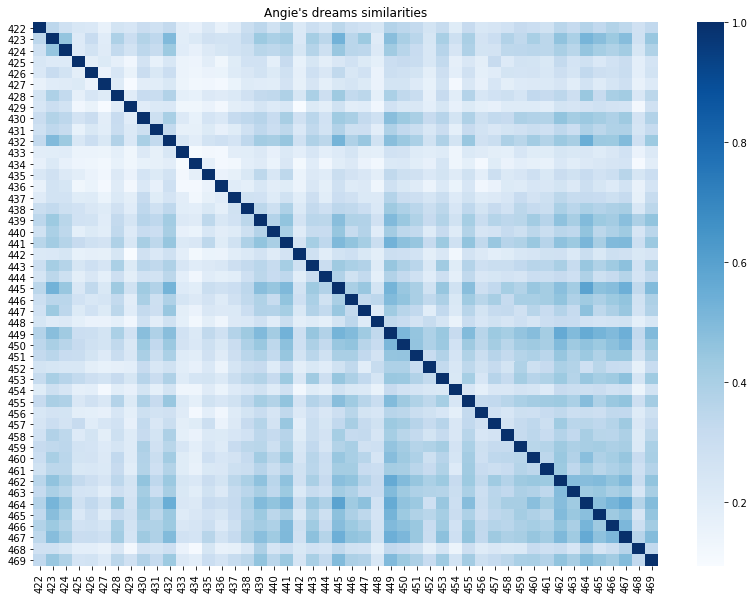

In [506]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(similarity_df, cmap="Blues", ax=ax).set_title("Angie's dreams similarities")

## Plot the cosine similarities in a scatterplot using Multidimensional scaling (MDS)

In [475]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)

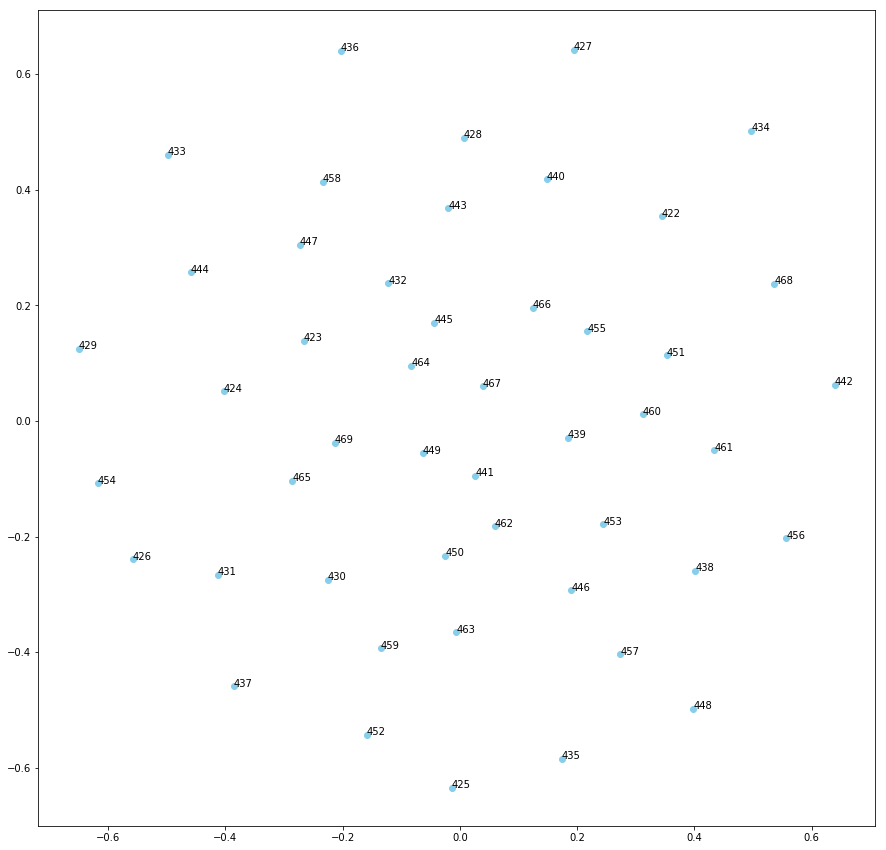

In [476]:
xs, ys = pos[:, 0], pos[:, 1]
names = pd.Series(selected_dreamer_df.index.values.tolist())

plt.figure(figsize=(15,15))

for x, y, name in zip(xs, ys, names):
    #color = 'orange' if "alta" in name else 'skyblue'
    plt.scatter(x, y, c=color)
    plt.text(x, y, name)
    
plt.show()

### In 3D

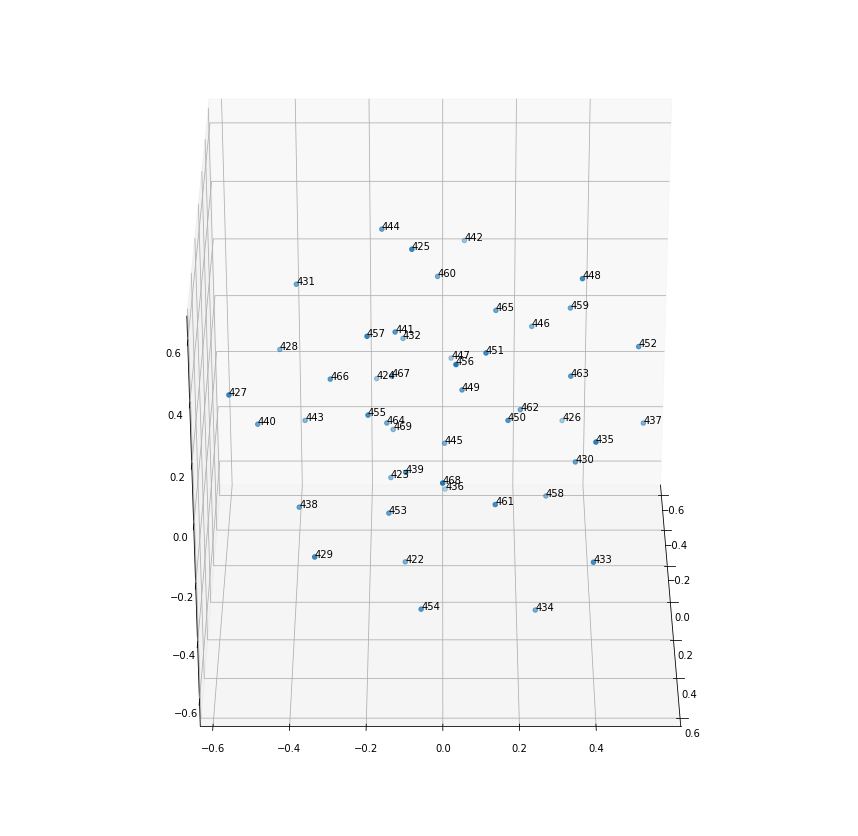

In [493]:
from mpl_toolkits.mplot3d import Axes3D

mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])
ax.view_init(30, 0)

for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
    ax.text(x, y, z, s)

plt.show()

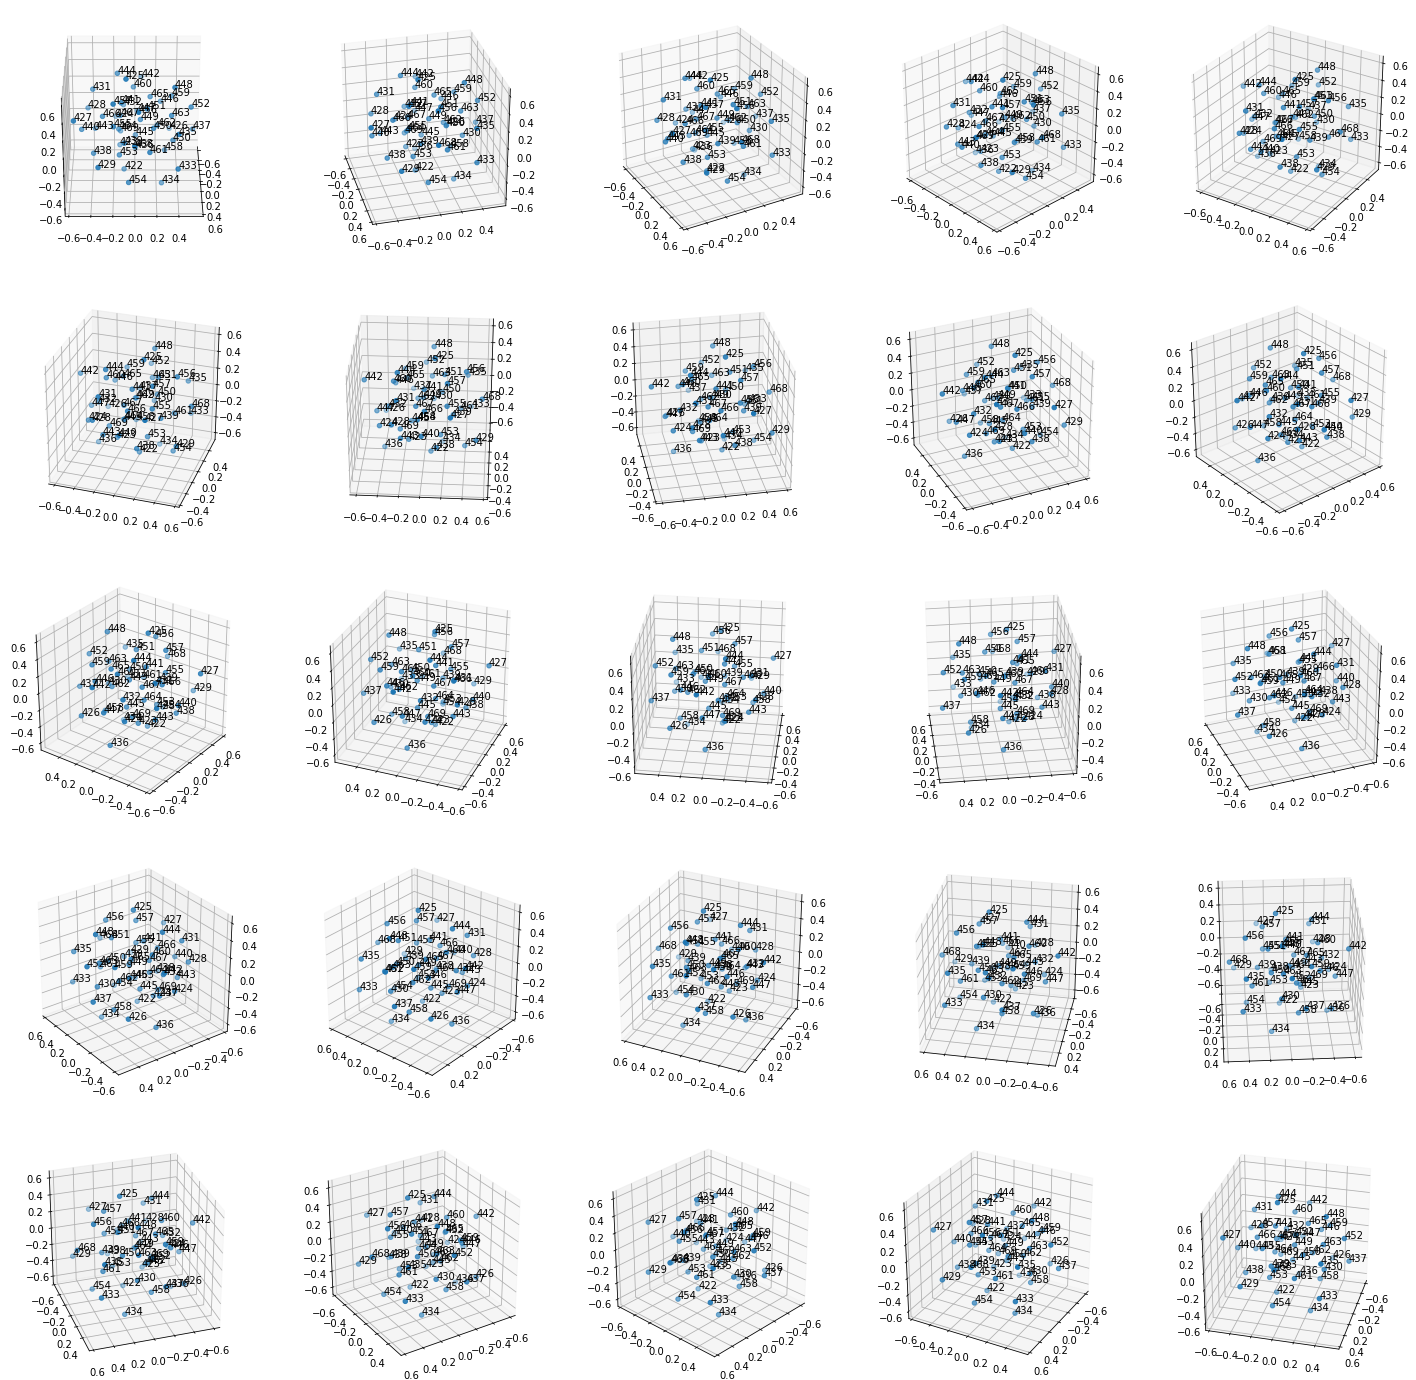

In [515]:
chart_count_vert = 5
chart_count_horiz = 5
number_of_graphs = chart_count_vert * chart_count_horiz
    
fig = plt.figure(figsize=(5 * chart_count_horiz, 5 * chart_count_vert))    

for i in range(number_of_graphs):
    ax = fig.add_subplot(
        chart_count_horiz, 
        chart_count_vert, 
        i + 1, 
        projection='3d', 
        azim=(-360 / number_of_graphs) * i)
    ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])
    for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
        ax.text(x, y, z, s)

#plt.savefig('angie_dreams.pdf')

### Make an animation

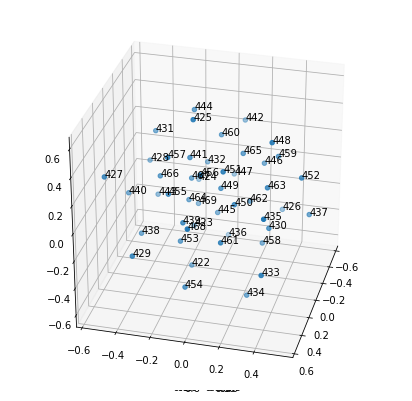

In [523]:
fig = plt.figure(figsize=(7,7))

for i in range(number_of_graphs):
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])
    ax.view_init(30, -360 / number_of_graphs * i)

    for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
        ax.text(x, y, z, s)

    plt.savefig('output/3d/angie_dreams_'+ str(i) +'.pdf')